<a href="https://colab.research.google.com/github/adityal10/Mice-Protein/blob/main/Mice-Protien-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MICE PROTEIN

- There are 72 mice in total: 38 control mice and 34 trisomic mice.

- For each protein, there are 15 measurements per mouse, resulting in 570 measurements for control mice and 510 measurements for trisomic mice (total of 1080 measurements per protein).

- The 8 classes of mice are based on combinations of genotype, treatment, and
 behavior.
- The dataset has 82 attributes: 1 for Mouse ID, 77 for protein expression levels, 1 for genotype, 1 for treatment, 1 for behavior, and 1 for class.
-The mice are divided into different groups based on their genotype (control or trisomic, which represents Down syndrome), treatment (memantine or saline), and behavior (context-shock or shock-context).

**AIM**: Finding groups or combinations of proteins whose expression levels can effectively distinguish or differentiate between the different classes of mice in the dataset.

## Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the data
path = "/content/drive/MyDrive/Datasets/"
mice_df = pd.read_excel(path+'Data_Cortex_Nuclear.xls')
print(mice_df.shape)

(1080, 82)


In [ ]:
# basic info
mice_df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.

In [ ]:
# null values
mice_df.isna().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N   

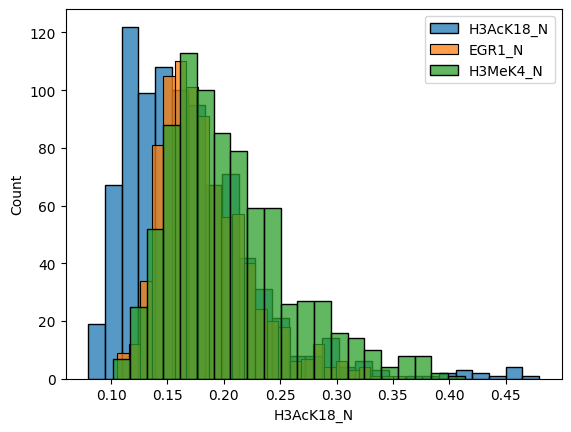

In [ ]:
# these are the columsn with highest number of missing values
# we will replace those missing values by their mean or meadian
# by looking at their plots distribution

nacols = ['H3AcK18_N', 'EGR1_N','H3MeK4_N','BCL2_N','BAD_N', 'pCFOS_N']
sns.histplot(mice_df.H3AcK18_N, label='H3AcK18_N')
sns.histplot(mice_df.EGR1_N, label='EGR1_N')
sns.histplot(mice_df.H3MeK4_N, label='H3MeK4_N')
plt.legend()

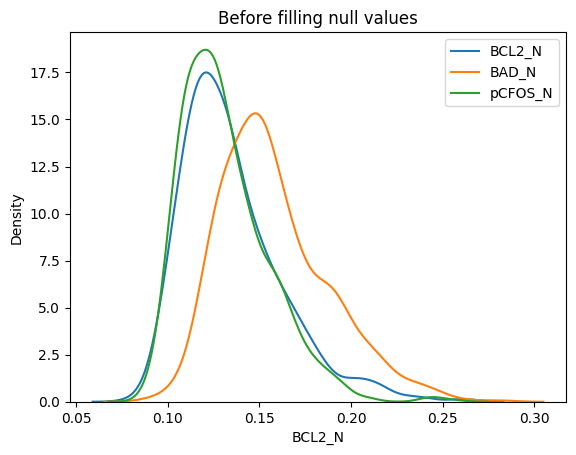

In [ ]:
nacols = ['H3AcK18_N', 'EGR1_N','H3MeK4_N','BCL2_N','BAD_N', 'pCFOS_N']
sns.kdeplot(mice_df.BCL2_N, label='BCL2_N')
sns.kdeplot(mice_df.BAD_N, label='BAD_N')
sns.kdeplot(mice_df.pCFOS_N, label='pCFOS_N')
plt.title("Before filling null values")
plt.legend()

In [ ]:
# filling the missing values in the nacols with median
mice_df = mice_df.fillna(mice_df[nacols].median())
mice_df.isna().sum()
mice_df = mice_df.dropna()

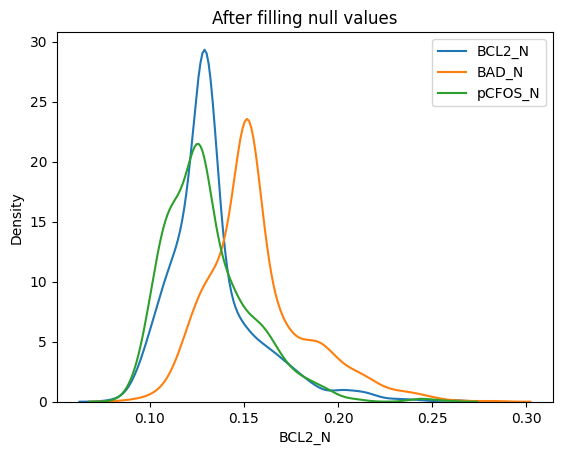

In [ ]:
nacols = ['H3AcK18_N', 'EGR1_N','H3MeK4_N','BCL2_N','BAD_N', 'pCFOS_N']
sns.kdeplot(mice_df.BCL2_N, label='BCL2_N')
sns.kdeplot(mice_df.BAD_N, label='BAD_N')
sns.kdeplot(mice_df.pCFOS_N, label='pCFOS_N')
plt.title("After filling null values")
plt.legend()

In [ ]:
# 570 observations in control genotype
# 510 observations in down syndrome genotype
mice_df[['Genotype', 'Treatment', 'Behavior', 'class']].value_counts()

Genotype  Treatment  Behavior  class 
Control   Memantine  C/S       c-CS-m    150
                     S/C       c-SC-m    150
Ts65Dn    Memantine  C/S       t-CS-m    135
                     S/C       t-SC-m    135
          Saline     S/C       t-SC-s    132
Control   Saline     C/S       c-CS-s    120
                     S/C       c-SC-s    120
Ts65Dn    Saline     C/S       t-CS-s    105
dtype: int64

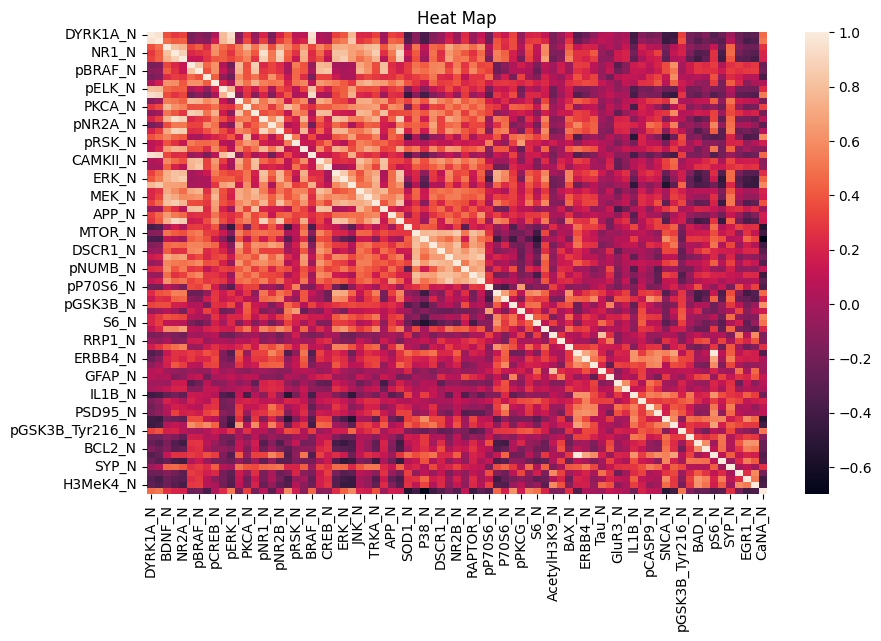

In [ ]:
# correlation map
plt.figure(figsize=(10,6))
sns.heatmap(mice_df.corr())
plt.title("Heat Map")
plt.show()

# Clustering Algorithms

## Agglomerative Clustering

In [ ]:
# data standardization
# we use standard scaler
# since there are many feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_new_mice_df = pd.DataFrame(scaler.fit_transform(new_mice_df))
std_new_mice_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,0.301559,0.501361,2.259781,1.486237,2.294792,-0.379011,-0.195288,-0.890673,0.588592,0.673495,0.396906,-0.192465,1.679872,0.460296,1.647167,-0.653132,1.151744,1.668249,-0.050569,1.417998,0.164612,0.119757,-0.061282,2.058833,1.844683,1.478511,0.694622,1.140112,0.995651,-0.098594,0.795384,2.032904,-0.625216,0.105880,-0.884423,0.529544,-0.083095,1.264458,0.246848,0.589341,0.442038,0.944928,-0.616088,0.026558,-0.611933,1.609135,-0.423921,0.060534,-0.537681,0.415037,-0.240819,-0.243971,0.507980,-1.050888,-0.747483,-0.189076,-1.228749,-0.416685,0.190246,0.627545,-1.161910,-1.429991,0.198656,-0.873565,-2.125543,-1.131808,-0.167345,-1.282832,-1.271254,-0.167234,-1.050888,-0.969742,-0.272364,-0.961499,-1.348049,-1.532703,1.054068
1,0.345124,0.272204,1.888603,1.409793,1.970304,-0.556194,-0.377102,-0.953822,0.428786,0.345043,0.417266,-0.343925,1.355716,0.113279,1.098856,-0.748813,0.597444,1.112684,0.006889,1.216521,0.091778,-0.134956,-0.259804,1.746022,1.541026,1.365176,0.414273,0.768827,0.722345,-0.403333,0.422391,1.768643,-0.721373,-0.426067,-1.001451,0.016474,-0.396497,0.834474,-0.216619,0.174489,0.119461,0.528268,-0.731503,0.024374,-0.583456,1.722409,-0.430240,0.043627,-0.538085,0.323989,-0.233825,-0.274159,0.282413,-1.030982,-0.386479,-0.123803,-1.097196,-0.196849,0.475462,0.600784,-0.846587,-1.093427,0.473534,-0.913804,-2.063345,-1.334083,0.019052,-0.888065,-1.493499,-0.167234,-1.030982,-1.142676,-0.055529,-1.012730,-1.258165,-1.472561,1.265979
2,0.323551,0.434555,2.020465,1.118111,1.903326,-0.620853,-0.265866,-0.960643,0.528434,0.270536,0.366632,-0.504567,1.259035,0.121982,1.492653,-0.670161,0.619698,1.060301,0.362913,1.050736,0.089412,0.090944,-0.251317,1.759381,1.671881,1.332745,0.538099,0.947142,0.760437,-0.272955,0.296494,1.819454,-0.716370,-0.404093,-1.001261,-0.021411,-0.411051,0.577868,-0.127731,0.105917,-0.043064,0.420635,-0.860211,0.102718,-0.533652,2.026372,-0.282493,0.250188,-0.311409,0.249689,-0.158818,-0.566664,0.596513,-0.912290,-0.725034,-0.207163,-1.122026,-0.232271,0.667251,0.615983,-0.204882,-1.169752,0.440644,-0.865901,-2.127110,-1.409212,-0.007904,-1.117677,-1.425520,-0.167234,-0.912290,-1.060785,-0.142436,-1.014383,-1.305404,-1.548175,1.836054
3,0.057248,-0.011582,0.816833,0.490195,1.219969,-0.279118,-0.237517,-1.062056,-0.178831,0.342301,0.096884,-0.391910,1.183087,0.836130,0.417197,-1.104120,0.017558,1.300273,0.521571,0.344329,0.024429,-0.006135,-0.042253,0.335790,0.758725,1.002454,0.535621,0.155615,0.345409,-0.226658,0.092335,0.805837,-0.713498,-0.340121,-0.942541,-0.102654,-0.380094,0.297204,-0.185650,0.151230,0.239117,0.353786,0.062927,-0.667314,-1.092378,1.175987,-0.129328,0.104953,-0.997128,0.024936,-0.295994,-0.026597,0.322107,-1.267435,-1.032884,-0.700631,-1.257433,-0.256229,0.386557,0.713622,-1.161448,-1.311118,-0.278111,-1.099423,-1.647045,-1.447383,-0.149244,-1.171420,-0.894168,-0.167234,-1.267435,-0.843880,-0.802519,-0.676655,-0.923333,-1.148944,1.131748
4,0.028796,-0.010187,0.820380,0.201794,0.942582,-0.519993,-0.346091,-1.076210,-0.630599,0.149222,0.004216,-0.593718,0.919580,0.038697,0.329327,-1.169109,-0.299140,1.051338,0.612701,0.018865,-0.058390,-0.151392,-0.216218,0.449905,0.646649,0.760073,0.254268,0.020543,0.084962,-0.486666,-0.103586,0.706187,-0.767821,-0.651213,-1.128717,-0.547413,-0.477628,-0.114153,-0.579895,-0.087332,-0.059176,0.007536,0.029830,-0.720673,-1.046487,1.255483,-0.071163,0.116774,-0.862974,0.047819,-0.270057,-0.194835,0.474776,-1.156437,-0.945472,-0.545320,-1.060087,-0.360155,0.971829,0.557381,-0.556880,-1.288781,-0.076411,-0.896158,-1.661785,-1.403867,0.328390,-0.710343,-0.999414,-0.167234,-1.156437,-0.868313,-0.166738,-0.894068,-1.116776,-1.118621,1.565710


In [ ]:
std_new_mice_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
count,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03,1.047000e+03
mean,-1.900210e-16,2.035939e-16,9.908237e-16,4.071878e-17,1.764481e-16,-9.161726e-17,-1.764481e-16,1.085834e-16,4.071878e-17,2.714585e-16,-1.900210e-16,6.786464e-16,6.990057e-16,-4.614795e-16,-5.429171e-16,-2.171668e-16,1.900210e-16,6.107817e-17,4.071878e-17,4.479066e-16,-1.187631e-16,-3.189638e-16,2.680653e-16,-2.035939e-16,1.832345e-16,1.866277e-16,-4.071878e-17,1.163879e-15,-1.184238e-15,3.393232e-16,1.357293e-16,-7.397245e-16,-4.614795e-16,-8.143756e-16,5.836359e-16,4.750524e-16,3.596826e-16,-4.750524e-16,3.936149e-16,3.393232e-16,6.786464e-16,6.107817e-17,5.429171e-17,4.071878e-17,-4.292438e-16,9.772508e-16,-5.429171e-17,-1.723762e-15,-3.528961e-16,4.614795e-16,5.429171e-17,1.900210e-16,1.289428e-16,-3.461096e-16,-1.832345e-16,-1.289428e-16,-2.171668e-16,8.822403e-16,1.900210e-16,3.359299e-16,4.004014e-16,-1.357293e-16,5.089848e-16,1.764481e-16,2.714585e-17,-1.085834e-16,-1.560887e-16,-2.884247e-16,5.361306e-16,1.187631e-16,-3.461096e-16,3.970081e-16,-2.578856e-16,5.429171e-17,2.578856e-16,6.786464e-17,4.750524e-17
std,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00,1.000478e+00
min,-1.121010e+00,-1.476953e+00,-4.092785e+00,-2.748732e+00,-2.227855e+00,-2.788538e+00,-2.872312e+00,-1.687633e+00,-3.045075e+00,-2.135674e+00,-1.147951e+00,-2.924002e+00,-2.418091e+00,-2.885100e+00,-2.729474e+00,-2.366602e+00,-4.599162e+00,-1.971773e+00,-3.024404e+00,-2.862160e+00,-1.081212e+00,-2.851120e+00,-2.523969e+00,-2.006571e+00,-2.032957e+00,-4.136525e+00,-2.970582e+00,-3.056785e+00,-4.043467e+00,-2.157256e+00,-2.749740e+00,-2.311547e+00,-1.163341e+00,-3.808528e+00,-2.081937e+00,-4.794095e+00,-4.235706e+00,-2.237090e+00,-4.272388e+00,-2.688568e+00,-2.209176e+00,-2.657805e+00,-1.676925e+00,-2.157308e+00,-3.515892e+00,-3.145442e+00,-1.893177e+00,-2.938296e+00,-2.150493e+00,-1.836959e+00,-8.695147e-01,-7.100581e+0

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

Linkage:

    - Simple
    - Complete
    - Average
    - ward

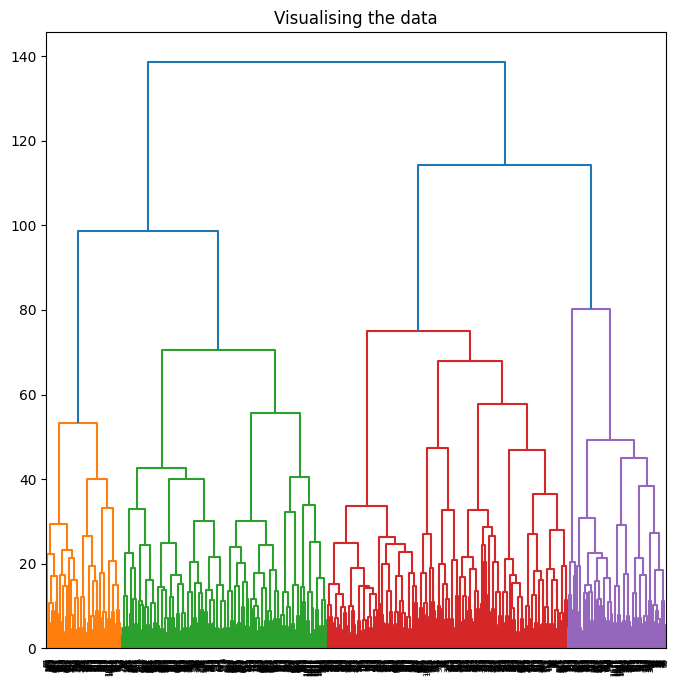

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(std_new_mice_df, method ='ward')))

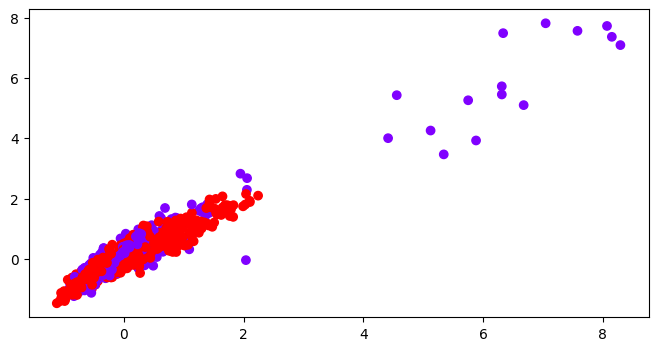

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(8, 4))
plt.scatter(std_new_mice_df.iloc[:,0], std_new_mice_df.iloc[:,1],
           c = ac2.fit_predict(std_new_mice_df), cmap ='rainbow')
plt.show()

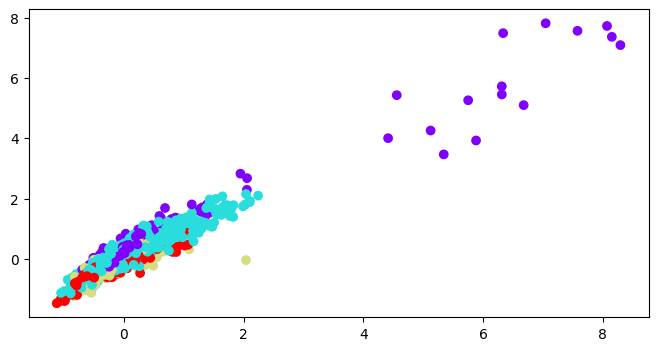

In [ ]:
# std_new_mice_df.iloc[:,1]
ac2 = AgglomerativeClustering(n_clusters = 4)

# Visualizing the clustering
plt.figure(figsize =(8, 4))
plt.scatter(std_new_mice_df.iloc[:,0], std_new_mice_df.iloc[:,1],
           c = ac2.fit_predict(std_new_mice_df), cmap ='rainbow')
plt.show()

## K-Means Clustering

In [ ]:
np.random.seed(120)
np.random.randint(0,100)

39

In [ ]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=5, random_state=1240)
kmeans_object.fit(std_new_mice_df)


kmeans_clusters = kmeans_object.labels_

In [ ]:
kmeans_clusters

array([3, 3, 3, ..., 2, 2, 4], dtype=int32)

In [ ]:
np.unique(kmeans_clusters, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([244, 244, 192, 159, 208]))

In [ ]:
kmeans_results = pd.DataFrame({"label":mice_classes,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
0,c-CS-m,3
1,c-CS-m,3
2,c-CS-m,3
3,c-CS-m,0
4,c-CS-m,0


In [ ]:
# inspecting cluster centroids to undersatnd avg stats
# Using inverse_transform to retrive actual values from standardized data
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans_object.cluster_centers_),
                                 columns=new_mice_df.columns)
cluster_centroids

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.558262,0.750175,0.320205,2.288529,3.803649,0.220655,0.174723,3.098867,0.208268,1.520442,0.730608,0.296696,0.334034,0.262487,0.797763,0.611291,1.505117,1.879338,0.470233,0.625673,0.492657,0.349637,0.175700,1.136608,2.548274,1.327328,0.245861,0.269631,0.724298,0.166978,0.419617,2.133238,0.351328,0.404304,0.333510,0.676112,0.536560,0.339136,0.509151,0.352139,0.284374,0.390953,0.392943,0.189498,0.914298,0.170837,1.957557,0.306647,0.508275,1.170223,0.214137,0.160757,0.182213,0.109846,0.149045,0.174121,0.205178,0.121134,0.217377,0.123037,0.470240,0.283652,1.464144,2.195155,0.138977,1.126618,0.881104,0.215305,0.149519,0.124366,0.109846,0.121072,0.426853,0.155720,0.159382,0.183997,1.642140
1,0.315468,0.522411,0.309837,2.429428,4.145811,0.241995,0.185710,4.324008,0.222129,1.338895,0.377477,0.339521,0.298832,0.288652,0.879102,0.883228,1.717112,1.232156,0.435240,0.742234,0.277304,0.369010,0.177300,1.224919,2.544489,1.115716,0.241748,0.278683,0.714794,0.168381,0.389467,2.372128,0.801813,0.462064,0.440100,0.832394,0.578909,0.365713,0.581314,0.326672,0.308968,0.407724,0.375380,0.180897,1.037739,0.146920,1.550272,0.285252,0.361621,1.211962,0.169909,0.154471,0.183479,0.132311,0.161190,0.197574,0.193796,0.112086,0.232490,0.131958,0.562337,0.282707,1.662161,2.435840,0.164795,1.360095,0.837667,0.222790,0.149720,0.128971,0.132311,0.123974,0.470723,0.166863,0.181074,0.198488,1.145292
2,0.349657,0.499913,0.256302,1.842516,2.812477,0.194123,0.155808,2.573874,0.173406,1.149634,0.448639,0.252750,0.256394,0.222431,0.683793,0.563839,1.236491,1.184862,0.394677,0.564168,0.304801,0.300711,0.156758,0.872145,1.841234,0.947816,0.200394,0.217076,0.530088,0.139860,0.347658,1.648382,0.458147,0.402169,0.391847,0.634268,0.503011,0.309778,0.480776,0.305721,0.273760,0.361648,0.354849,0.167019,0.876556,0.152283,1.585078,0.269618,0.427125,0.897399,0.254402,0.164025,0.164279,0.115305,0.150615,0.169662,0.220488,0.119931,0.222972,0.119395,0.550218,0.283730,1.475001,2.104745,0.161524,1.123792,0.817523,0.233675,0.160421,0.135507,0.115305,0.139660,0.389308,0.162817,0.191616,0.209681,1.253335
3,0.616621,0.869504,0.392802,2.767711,5.196755,0.237549,0.185756,3.751942,0.239005,1.805208,0.825727,0.345346,0.375436,0.293600,0.982525,0.856430,1.889688,1.986852,0.467218,0.828874,0.509356,0.387286,0.186034,1.724784,3.508261,1.460853,0.266419,0.319364,0.847578,0.170583,0.460566,2.717908,0.466502,0.494577,0.406256,0.824644,0.626101,0.447389,0.634243,0.427828,0.345368,0.483827,0.342950,0.216645,1.103260,0.177735,1.665949,0.325207,0.517998,1.650805,0.200110,0.166744,0.195891,0.126466,0.165763,0.194842,0.230929,0.123983,0.223902,0.134328,0.498589,0.310056,1.663759,2.255956,0.151317,1.227041,0.888593,0.221592,0.144088,0.124191,0.126466,0.118993,0.501386,0.149431,0.163672,0.174447,1.547765
4,0.333756,0.501968,0.325382,2.201232,3.396871,0.275471,0.210843,3.789938,0.223914,1.422948,0.420740,0.345480,0.325042,0.314132,0.806640,0.742822,1.496951,1.342690,0.455247,0.691430,0.340344,0.412036,0.207920,1.011856,2.080100,1.043196,0.261151,0.285574,0.659553,0.196001,0.416171,1.924268,0.618971,0.507465,0.507680,0.838514,0.695002,0.397819,0.632877,0.392088,0.375056,0.466410,0.466384,0.158674,0.828486,0.162530,1.638681,0.280064,0.350832,1.104253,0.244730,0.191810,0.171708,0.124176,0.157286,0.171637,0.209209,0.129354,0.209513,0.121692,0.554908,0.298606,1.520826,2.164544,0.184167,1.356125,0.815672,0.240563,0.180022,0.154639

In [ ]:
# ideal clustring number wss i.e (inertia)
# wss min - better clustering

wss= {}
for k in range(2, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=40,max_iter=300,random_state=1000).fit(std_new_mice_df)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center
wss

{2: 67601.61179313033,
 3: 60704.21392668331,
 4: 56458.086208629706,
 5: 52880.3213819473,
 6: 49969.46791491545,
 7: 47666.819941804104,
 8: 45586.337192266576,
 9: 43845.30632525419,
 10: 42313.494016555305,
 11: 41083.92237646124,
 12: 39878.88268073794,
 13: 38833.20778505949,
 14: 38045.18096831378,
 15: 37209.04208905667,
 16: 36466.701032041135,
 17: 35692.47981569123,
 18: 35083.27561458049,
 19: 34377.806812792056,
 20: 33859.68524291986}

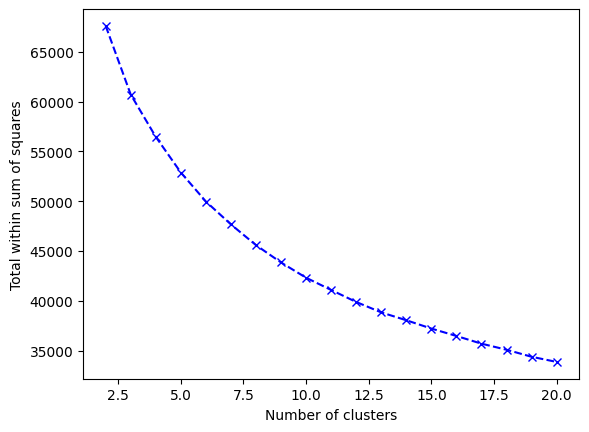

In [ ]:
%matplotlib inline
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

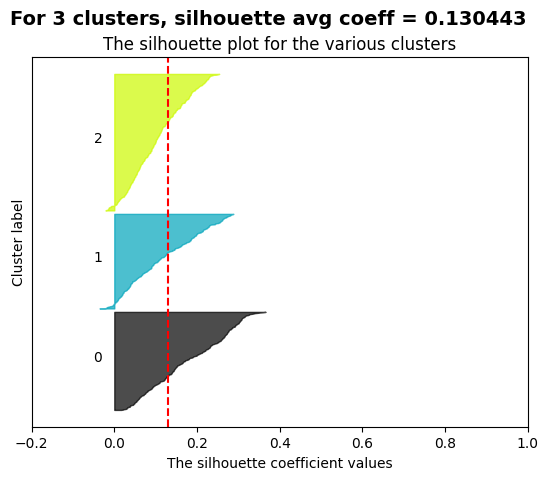

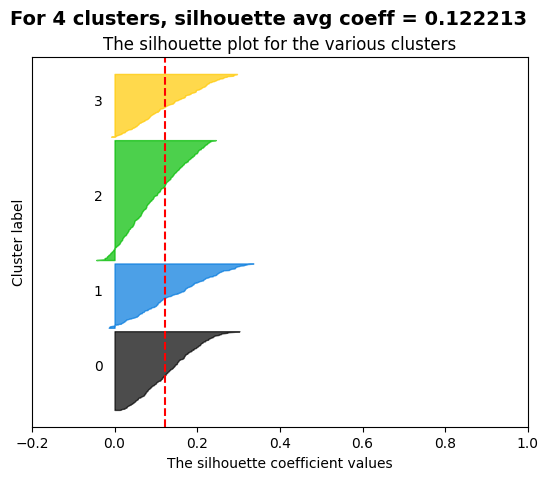

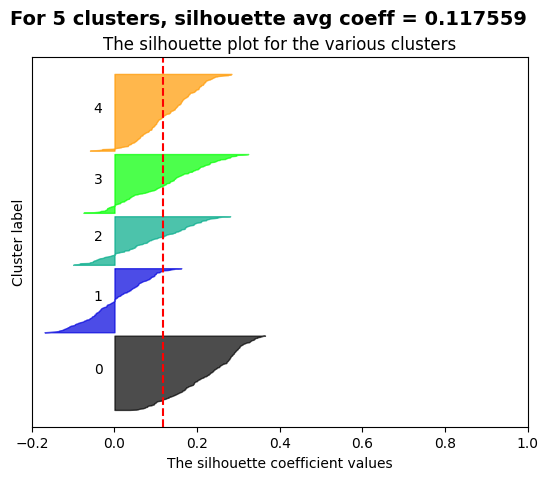

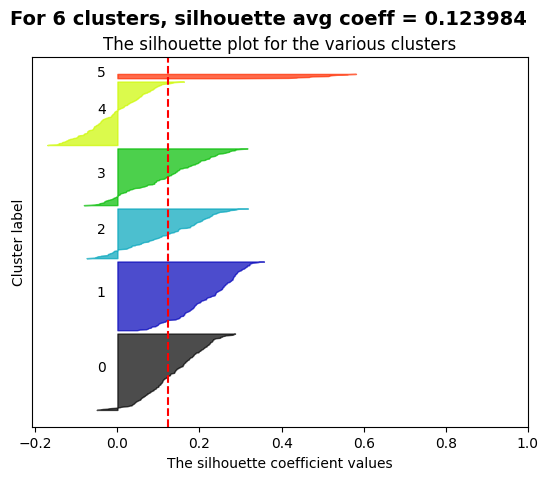

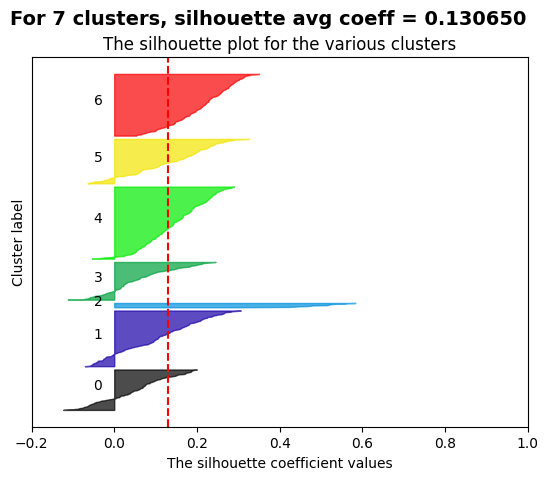

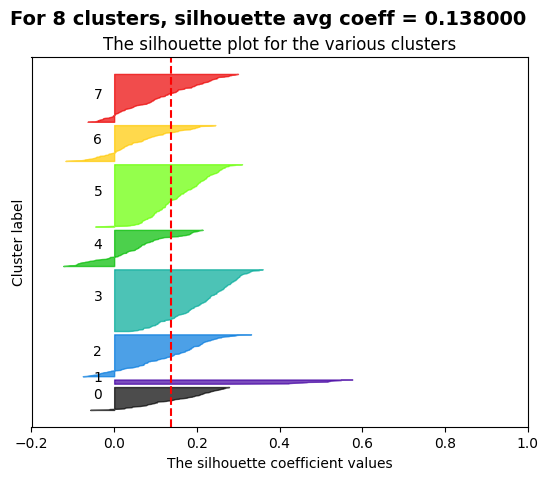

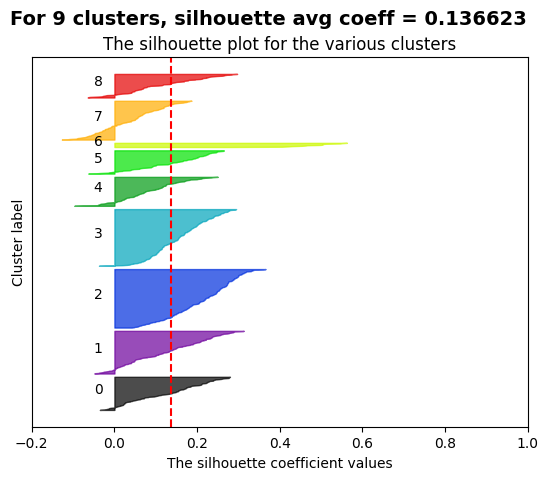

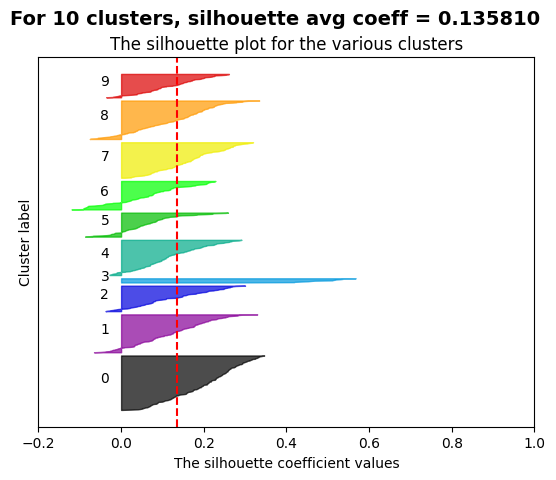

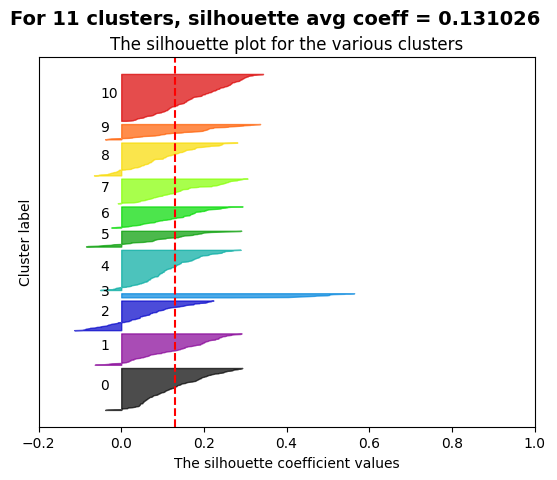

In [ ]:
# shilhoute analysis
# higher the shilhoute score higher the clustering

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = std_new_mice_df.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

Hence the best value of k is 8

In [ ]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_new_mice_df)
best_kmeans_labels = best_kmeans.labels_

In [ ]:
kmeans_results = pd.DataFrame({"class":mice_classes,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,class,kmeans_cluster
0,c-CS-m,1
1,c-CS-m,5
2,c-CS-m,5
3,c-CS-m,5
4,c-CS-m,5


In [ ]:
kmeans_results[kmeans_results.kmeans_cluster == 2]

,class,kmeans_cluster
14,c-CS-m,2
84,c-CS-m,2
85,c-CS-m,2
86,c-CS-m,2
87,c-CS-m,2
88,c-CS-m,2
89,c-CS-m,2
96,c-CS-m,2
97,c-CS-m,2
98,c-CS-m,2


In [ ]:
kmeans_results.kmeans_cluster.value_counts()

4    219
5    212
2    155
1    152
7    118
3     92
0     84
6     15
Name: kmeans_cluster, dtype: int64

In [ ]:
final_cluster_data = pd.merge(mice_df, kmeans_results, on='class')
final_cluster_data.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,kmeans_cluster
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.02206,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.36951,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.29417,0.18215,0.842725,0.192608,1.443091,0.2947,0.354605,1.33907,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.60331,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,1
1,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.02206,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.36951,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.29417,0.18215,0.842725,0.192608,1.443091,0.2947,0.354605,1.33907,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.60331,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,5
2,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.02206,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.36951,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.29417,0.18215,0.842725,0.192608,1.443091,0.2947,0.354605,1.33907,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.60331,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,5
3,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.02206,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.36951,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.29417,0.18215,0.842725,0.192608,1.443091,0.2947,0.354605,1.33907,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.60331,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,5
4,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.02206,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.45391,3.037621,0.36951,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.29417,0.18215,0.842725,0.192608,1.443091,0.2947,0.354605,1.33907,0.170119,0.159102,0.18885

In [ ]:
final_cluster_data[final_cluster_data.kmeans_cluster ==2]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,kmeans_cluster
14,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,2
84,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,2
85,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,2
86,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.12519,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,2
87,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.4

In [ ]:
final_cluster_data.kmeans_cluster.value_counts()

4    29970
5    27102
1    20097
2    20058
7    16089
3    12591
0    10992
6     1800
Name: kmeans_cluster, dtype: int64

In [ ]:
# analysing clusters

ClusterLevelMean = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
ClusterLevelMean

,kmeans_cluster,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0,0.325924,0.530061,0.316991,2.276670,3.655488,0.245298,0.187010,4.020857,0.223044,1.273480,0.365273,0.322810,0.311961,0.288927,0.820630,0.738157,1.520182,1.393251,0.458456,0.708038,0.288267,0.365126,0.184834,1.161604,2.338128,1.087752,0.241501,0.280814,0.688655,0.171228,0.415161,2.205143,0.737085,0.464547,0.442373,0.771697,0.592432,0.367149,0.578621,0.343434,0.324035,0.433912,0.493244,0.180386,0.921118,0.159119,1.982765,0.290155,0.438608,1.119254,0.288795,0.171410,0.180177,0.124493,0.159140,0.188215,0.243415,0.120377,0.215472,0.129969,0.536685,0.301075,1.568045,2.258198,0.165078,1.305781,0.852888,0.234206,0.166572,0.135079,0.124493,0.134292,0.440487,0.192147,0.188503,0.221986,1.176578
1,1,0.460952,0.653842,0.328714,2.331618,3.988142,0.233102,0.181398,3.299224,0.211410,1.458860,0.606235,0.314552,0.328483,0.274370,0.835366,0.694347,1.558718,1.639003,0.449695,0.690825,0.405251,0.364470,0.179968,1.211963,2.631836,1.226037,0.247007,0.276276,0.710537,0.168172,0.412841,2.180737,0.484076,0.456731,0.401492,0.748730,0.587096,0.376882,0.569193,0.378034,0.319852,0.426578,0.386279,0.186103,0.933787,0.166569,1.730333,0.300391,0.463294,1.249498,0.216751,0.168328,0.179145,0.119257,0.156360,0.180179,0.214064,0.123293,0.220358,0.126197,0.510521,0.296224,1.536587,2.181366,0.155161,1.203613,0.858022,0.226374,0.157208,0.131819,0.119257,0.127856,0.447234,0.165351,0.176286,0.198805,1.425441
2,2,0.504592,0.690408,0.316771,2.259995,3.760075,0.223514,0.177107,3.245996,0.207539,1.498501,0.664769,0.301654,0.318561,0.264048,0.806493,0.673861,1.522652,1.628329,0.446204,0.647381,0.443510,0.350296,0.177229,1.156066,2.478924,1.223156,0.241150,0.266950,0.690428,0.164719,0.409919,2.093052,0.418580,0.429848,0.380337,0.716468,0.566506,0.355589,0.536948,0.356966,0.300353,0.405567,0.369763,0.183071,0.943224,0.165371,1.698349,0.295475,0.457501,1.161021,0.192638,0.164705,0.178071,0.115501,0.152258,0.176970,0.200752,0.121379,0.222004,0.125001,0.509613,0.287907,1.515188,2.206095,0.151810,1.175278,0.856311,0.222047,0.154262,0.132443,0.115501,0.129186,0.437370,0.157922,0.174177,0.192510,1.473539
3,3,0.344887,0.536946,0.314489,2.287934,3.797440,0.244036,0.188491,3.992438,0.216350,1.348223,0.426088,0.329311,0.310277,0.287452,0.832488,0.790433,1.577087,1.356436,0.445008,0.703594,0.313324,0.370600,0.184431,1.150528,2.361888,1.106021,0.242080,0.275259,0.681405,0.171610,0.395635,2.156863,0.657966,0.468868,0.452930,0.801881,0.601721,0.374921,0.587011,0.351788,0.328123,0.425917,0.421755,0.175841,0.952444,0.155171,1.701292,0.285389,0.389279,1.166684,0.227687,0.168090,0.179075,0.126730,0.159213,0.186447,0.214816,0.118840,0.223147,0.127444,0.550750,0.290385,1.594349,2.282904,0.168113,1.317945,0.841285,0.229536,0.160676,0.136029,0.126730,0.134431,0.450810,0.178715,0.190767,0.212804,1.179420
4,4,0.313519,0.502718,0.309375,2.301518,3.802133,0.245505,0.190595,4.006673,0.216258,1.345320,0.384042,0.332040,0.301110,0.289131,0.841281,0.823112,1.612542,1.236567,0.436214,0.719549,0.292170,0.374891,0.184424,1.144248,2.302332,1.068380,0.241189,0.272828,0.674345,0.172782,0.383735,2.156010,0.719202,0.474279,0.469655,0.822245,0.603780,0.374240,0.595364,0.337769,0.327556,0.418753,0.399469,0.171595,0.963358,0.149953,1.542509,0.278693,0.350881,1.160129,0.216255,0.165791,0.178096,0.130456,0.160826,0.189126,0.207740,0.116838,0.226158,0.126155,0.571706,0.285547,1.609043,2.334026,0.173114,1.343965,0.828956,0

In [ ]:
# checking cluster stablilty
from sklearn.metrics import adjusted_rand_score
indices = std_new_mice_df.sample(frac=0.9,random_state=123).index
mice_class_std_subset = std_new_mice_df.iloc[indices,:]

# clus 1
kmeans_object = KMeans(n_clusters=8,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(std_new_mice_df)
clus1= kmeans_object.labels_


# clus 2
kmeans_object = KMeans(n_clusters=8,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(mice_class_std_subset)
clus2= kmeans_object.labels_

print(len(clus1))
print(len(clus2))

clus1 = clus1[indices]

adjusted_rand_score(clus1,clus2)

1047
942


0.6775358057847363

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clustering =  dbscan.fit(std_new_mice_df)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 1047


In [ ]:
dbscan = DBSCAN(eps=2, min_samples=2)
clustering =  dbscan.fit(std_new_mice_df)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 100
Estimated number of noise points: 822


In [ ]:
dbscan = DBSCAN(eps=3, min_samples=2)
clustering =  dbscan.fit(std_new_mice_df)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 215
Estimated number of noise points: 273


In [ ]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

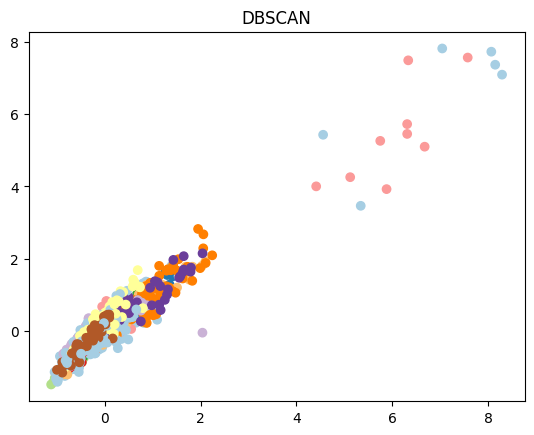

In [ ]:
dbscan(new_mice_df, eps=3, min_samples=2)

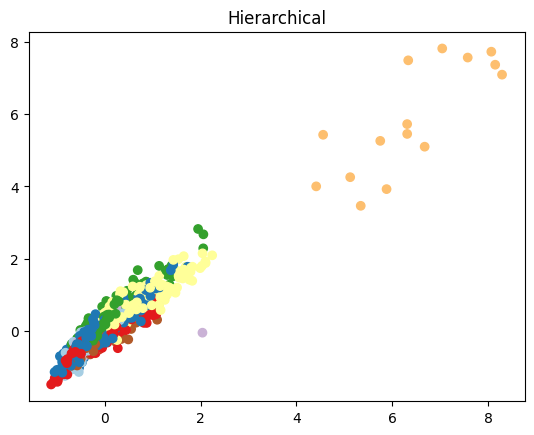

In [ ]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

hier(new_mice_df, 8)

# PCA

In [ ]:
# target variable - class
# deleting genotype, treamtment, mouseid & behaviour columns
# class (c-CS-m: genotype-behaviour-treatment)
colsdrop = ['MouseID', 'Genotype', 'Treatment', 'Behavior']
new_mice_df = mice_df.copy()
new_mice_df = new_mice_df.drop(colsdrop, axis=1)
new_mice_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.129468,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.129468,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.129468,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0

In [ ]:
new_mice_df['class'].unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [ ]:
mice_classes = new_mice_df['class']
# select all the columns except class
new_mice_df.drop('class', axis=1, inplace=True)
new_mice_df.head(3)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.129468,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.129468,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427


In [ ]:
mice_classes

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1047, dtype: object

In [ ]:
print(mice_df.shape)
pca_mice_df = mice_df.drop(['MouseID', 'Genotype',	'Treatment',	'Behavior'], axis=1)
print(pca_mice_df.shape)
display(pca_mice_df.head())

(1047, 82)
(1047, 78)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.129468,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.129468,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.129468,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0

In [ ]:
# splitting in train and validation sets
from sklearn.model_selection import train_test_split

X = pca_mice_df.loc[:,pca_mice_df.columns.difference(['class'])]
y = pca_mice_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(837, 77)
(210, 77)
(837,)
(210,)


In [ ]:
# standardizing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA


scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
numeric_std = scaler.fit_transform(X)
numeric_std_df = pd.DataFrame(numeric_std)

# applying pca
pca = PCA()
principalComponents = pca.fit_transform(numeric_std_df)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(principalComponents.shape[1])]
principalComponents = pd.DataFrame(principalComponents, columns=component_names)

display(principalComponents.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
0,0.652119,-0.823649,0.301098,0.443622,-0.118196,-0.069178,0.044816,-0.002469,-0.007249,0.352363,-0.030166,0.086612,-0.008021,0.021946,-0.075636,-0.106149,0.047560,0.238842,0.041286,-0.120638,-0.018278,-0.087425,-0.042652,0.014446,0.074839,0.108339,-0.075117,-0.088963,-0.080891,-0.130176,0.007347,0.049413,-0.088480,-0.036310,-0.051441,0.059142,0.055731,-0.059995,-0.002997,-0.007368,0.067669,0.043511,-0.003498,0.015572,-0.020505,-0.015529,0.016762,0.008912,0.037168,-0.000887,0.045400,0.039873,-0.001107,-0.035537,-0.069464,0.019720,0.023365,0.004380,0.000764,0.018607,-0.014132,0.000028,0.038581,-0.026637,0.001010,-0.005727,0.000577,0.014851,-0.032292,-0.020008,0.023897,-0.012401,0.016672,0.023073,-0.012439,0.004542,2.730901e-15
1,0.428570,-0.830978,0.159597,0.364767,-0.078267,-0.102891,0.027407,-0.001232,-0.004816,0.346843,-0.024882,0.128419,-0.005733,0.027152,-0.049777,-0.101820,0.080808,0.246630,0.049091,-0.158699,-0.007371,-0.054038,-0.020594,0.027248,0.096660,0.077656,-0.047448,-0.110455,-0.099945,-0.092060,-0.019038,0.045409,-0.043297,-0.056903,-0.058837,0.049831,0.047543,-0.070788,-0.005838,-0.003907,0.052637,0.037056,0.006888,-0.033337,-0.039225,-0.025120,0.005200,0.004844,0.027166,0.003360,0.031498,0.014128,-0.004242,-0.021346,-0.064794,0.014609,0.019666,-0.029027,0.030547,0.019627,0.000699,-0.002988,0.014302,-0.041073,-0.003574,0.011439,0.013055,0.009423,-0.005802,-0.022884,0.008719,-0.026674,-0.008257,-0.013983,0.001923,0.015357,4.001970e-16
2,0.442582,-0.882709,0.131571,0.302495,-0.038058,-0.145154,0.038887,-0.015738,0.032808,0.375569,-0.031858,0.159430,-0.023780,0.021323,-0.034535,-0.113607,0.092127,0.253719,0.032054,-0.158632,0.007182,-0.045060,-0.035766,0.065265,0.077491,0.067583,-0.036580,-0.099038,-0.012667,-0.148119,0.034213,0.076755,-0.003912,-0.020255,-0.099215,0.070672,0.069086,-0.044874,-0.005686,0.003352,0.004361,0.011280,-0.001971,-0.029265,-0.058161,-0.023805,-0.002966,-0.004364,-0.001590,-0.001699,0.025978,0.023493,0.006384,-0.040939,-0.098519,0.018592,0.024036,-0.029369,0.037606,0.032709,-0.005912,-0.009148,0.030493,-0.009652,-0.009659,0.001645,0.007849,0.029125,-0.022090,-0.012762,-0.001603,-0.007530,0.027185,0.023419,-0.003138,0.000174,-5.220581e-16
3,0.079153,-0.634878,0.439594,0.250595,-0.157537,-0.180182,-0.023676,-0.033807,-0.015680,0.326363,0.044155,0.163158,-0.023016,0.006555,-0.109640,-0.089867,0.095444,0.143179,-0.021700,-0.082982,0.054513,-0.070750,-0.001388,0.065842,0.101664,0.074313,-0.081550,-0.055358,-0.045311,-0.075115,0.007851,0.050932,-0.025793,-0.044585,-0.061209,-0.029517,0.017792,-0.051332,0.003266,0.017727,0.032507,0.054076,0.032562,0.001577,-0.019227,-0.001977,0.014819,0.043881,0.063067,-0.042234,0.000037,0.020580,0.019438,-0.019446,-0.048260,0.042807,0.026946,0.018606,0.009153,0.001020,-0.004996,-0.025297,0.012662,0.003888,-0.030647,-0.014768,0.006029,0.016288,-0.016365,0.009855,0.005610,-0.015449,0.015156,-0.006373,-0.001281,0.004587,-4.877878e-16
4,-0.063726,-0.690756,0.266582,0.167642,-0.121422,-0.206620,-0.104209,-0.001118,-0.014423,0.330848,0.058119,0.204277,-0.045538,0.023115,-0.111920,-0.084351,0.106925,0.173394,-0.038789,-0.106894,0.041232,-0.020888,0.037611,0.088743,0.074351,0.038871,0.001760,-0.049263,-0.033889,-0.062721,0.012626,0.069188,0.004119,-0.010177,-0.084433,-0.021331,0.040328,-0.063891,0.001386,0.027392,0.033529,0.034935,0.011368,0.010971,-0.034184,-0.038546,-0.033421,0.000895,0.046856,-0.013996,0.024948,0.007154,0.014837,-0.004879,-0.079477,0.011145,0.026877,0.009641,0.041828,0.009376,-0.000096,-0.005596,0.017454,0.007342,-0.032091,0.007693,-0.002910,0.029368,-0.024915,0.000602,0.017047,0.

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
ADARB1_N,0.173114,-0.076212,-0.054360,0.074332,0.009553,0.129357,-0.230021,-0.232116,-0.272375,-0.048526,0.327721,-0.074358,-0.035454,0.316215,0.075389,0.231265,0.073201,-0.175743,-0.057812,0.024209,0.196369,-0.203528,0.036397,-0.170742,0.113834,0.092149,0.270938,-0.167997,-0.081770,0.013530,0.152904,0.176420,0.081075,-0.024034,0.065911,-0.139607,0.048358,-0.057923,0.050393,0.013101,-0.063209,-0.058706,0.006382,-0.055047,0.036065,0.047076,-0.046818,-0.077056,-0.145057,0.010804,-0.092589,-0.043191,0.056765,-0.008102,0.017185,0.029909,-0.091678,-0.079553,0.075640,-0.019034,0.093866,-0.020952,-0.029294,0.062069,0.045036,-0.040472,0.054397,0.040996,-0.000543,-0.006447,0.055373,-0.001569,-0.005870,0.054214,0.009792,-0.016364,-8.929158e-17
AKT_N,0.177053,0.029426,-0.061773,0.098152,0.060103,0.028369,0.128970,0.079265,-0.094787,0.100974,-0.017897,-0.111921,0.064816,-0.184322,0.063911,0.091944,0.211579,0.150679,-0.019436,0.038339,-0.011246,-0.100432,0.047870,0.095437,0.093489,0.138695,0.009973,0.061033,0.062842,-0.101219,-0.152576,0.097891,-0.101033,0.162995,-0.059909,0.020153,0.066298,-0.319434,0.143465,0.002485,0.030475,0.135687,-0.042351,-0.220067,0.119686,-0.037688,0.048171,0.013974,-0.032865,0.091147,0.094019,-0.182155,-0.181773,-0.098589,0.185150,0.079178,0.125626,-0.000032,-0.121507,-0.064132,0.016574,0.016743,-0.318949,-0.049826,0.056301,-0.087031,0.069878,0.147586,0.290683,0.059086,0.081710,-0.061506,0.088637,-0.028334,-0.006347,0.012627,-1.503968e-16
AMPKA_N,0.144797,0.025757,0.091300,0.174666,0.018720,0.146885,-0.053110,0.027287,-0.041088,0.011872,-0.010872,0.039321,0.055420,-0.107928,0.003398,-0.118420,-0.001206,-0.041306,0.031204,-0.075581,-0.092671,-0.054017,-0.006458,0.030762,-0.011673,0.043060,-0.014190,-0.099613,0.050002,0.045820,0.003276,-0.003422,0.040187,0.094856,0.041612,-0.001271,0.055534,-0.082877,-0.096606,-0.056581,0.047675,0.064661,0.103188,0.162771,-0.102124,0.012647,-0.009288,-0.098372,0.015073,0.040693,-0.020536,-0.033760,-0.090468,-0.064300,0.081424,0.003753,-0.276847,-0.040799,-0.035742,-0.218221,-0.000839,-0.240381,-0.005379,0.048366,0.076229,0.235169,-0.243593,-0.489442,0.298420,-0.202671,-0.063668,0.105076,-0.058483,0.157198,0.031141,-0.035820,-2.350595e-16
APP_N,0.145616,-0.069959,0.099980,-0.027682,-0.009434,0.119565,0.015464,0.115404,-0.027154,-0.146421,-0.330488,-0.028133,-0.120441,0.448349,-0.297673,0.200684,-0.015124,0.143483,0.239003,0.150339,0.035976,-0.053204,-0.040469,-0.001789,-0.050716,-0.116574,-0.019520,0.220373,-0.003650,0.022205,-0.002091,0.021933,0.015272,0.006486,-0.032007,-0.080022,0.064128,-0.129912,-0.213755,0.073891,-0.074539,-0.014337,0.074546,-0.128400,-0.065562,0.153107,-0.102316,0.011349,0.092634,-0.000437,0.117320,-0.013866,0.042753,0.030945,0.074153,-0.050964,-0.023916,0.073727,-0.047064,-0.236782,-0.155064,0.079344,-0.029878,-0.046504,0.004806,0.006521,0.007161,-0.031821,-0.011665,-0.022655,-0.011318,-0.013728,0.046029,0.017066,-0.019767,0.064893,-1.398681e-16
ARC_N,0.101797,0.161648,-0.233765,0.012961,0.051627,0.030452,-0.021098,0.000890,-0.120910,-0.147121,0.113643,0.055408,-0.031523,-0.073685,-0.125733,-0.150767,0.174622,0.031785,0.148198,-0.010586,0.202297,-0.043355,0.097085,0.070783,-0.073113,0.087111,-0.003557,0.162580,0.161604,-0.039396,0.209355,-0.128989,-0.022347,-0.064356,0.068513,0.094823,-0.025587,0.125738,-0.024785,-0.090949,-0.037772,0.023176,0.003811,-0.032329,-0.052162,-0.028933,-0.032069,0.007034,0.095114,0.023795,0.033639,-0.000792,0.033802,0.002692,-0.016401,-0.010496,0.017272,-0.020349,-0.025789,0.022335,0.010802,0.035387,0.013839,-0.010622,-0.004962,-0.009368,-0.021433,0.004718,0.02

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

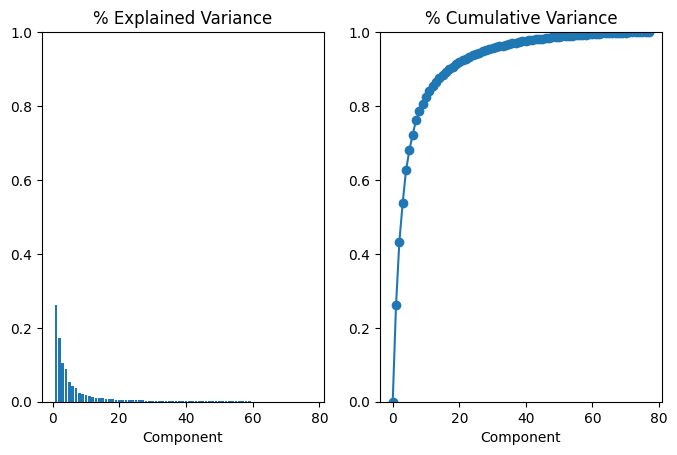

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26228334, 0.43337624, 0.53786012, 0.62606745, 0.68009079,
       0.72293368, 0.76121234, 0.78555577, 0.80611708, 0.82473398,
       0.84044418, 0.85316552, 0.86450165, 0.87461288, 0.88383797,
       0.89233973, 0.89988369, 0.90680325, 0.9127942 , 0.91851733,
       0.92405264, 0.92857603, 0.93278429, 0.93682301, 0.94068166,
       0.9443897 , 0.94771909, 0.95083743, 0.95377728, 0.95638315,
       0.9589191 , 0.96139177, 0.96363984, 0.96585152, 0.9678977 ,
       0.96972101, 0.97142214, 0.97310589, 0.97467234, 0.97612499,
       0.97752931, 0.97883125, 0.98010066, 0.981323  , 0.98247123,
       0.98359034, 0.98466437, 0.98567812, 0.98667768, 0.9875977 ,
       0.98844507, 0.98926803, 0.99004215, 0.99076249, 0.99148234,
       0.99216913, 0.99282689, 0.99345674, 0.99407685, 0.9946746 ,
       0.99524969, 0.99578681, 0.99628488, 0.99676913, 0.99721707,
       0.9976561 , 0.99802369, 0.99835464, 0.99866687, 0.99895985,
       0.99922007, 0.99944082, 0.99963702, 0.99980735, 0.99991

<Axes: >

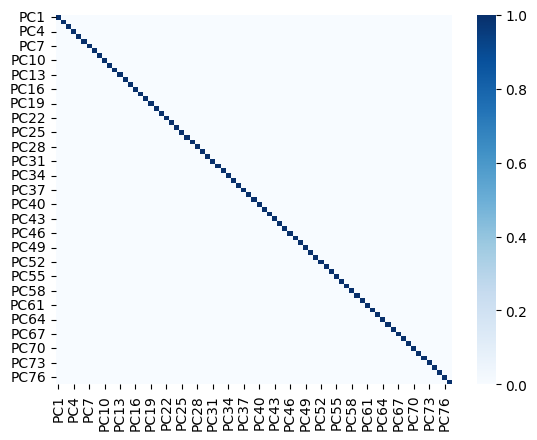

In [ ]:
sns.heatmap(principalComponents.corr(),cmap='Blues')

In [ ]:
# model building with pca components

principalDf = principalComponents.iloc[:,0:30]

# preaparing data for the model
Data_for_model = pd.concat([principalDf,pca_mice_df['class']], axis=1)
Data_for_model = Data_for_model.dropna()

# Divide in to train and test
y1=Data_for_model["class"]
X1=Data_for_model.drop(['class'], axis=1)

#from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

X1_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
49,0.898204,-0.214876,-0.510504,0.394035,0.630549,0.212064,-0.260245,-0.120546,-0.231027,-0.078254,0.219581,-0.031295,-0.111845,-0.199173,-0.127101,0.002045,-0.015424,0.037700,-0.024844,-0.025291,-0.095204,-0.017502,-0.099638,-0.047839,-0.034537,0.036278,-0.019175,0.067893,0.034156,0.121313
673,0.236093,0.183507,0.992237,-0.865242,-0.180901,0.139025,-0.396896,0.426791,0.167327,0.017773,-0.202575,0.012430,-0.225193,-0.130132,0.029222,0.087520,-0.086739,-0.185735,0.055568,0.100409,0.086552,0.091568,0.030802,0.052877,-0.071957,0.137670,0.162770,0.130578,0.048163,0.109393
595,-1.050190,0.173594,0.259153,0.493272,0.286518,-0.055256,0.075541,0.199650,0.033366,-0.165482,-0.284747,0.011794,-0.049455,-0.098049,0.103442,0.146612,-0.181978,0.128150,0.039903,0.027943,0.098308,-0.114040,-0.032102,-0.137592,-0.087172,-0.076582,-0.068995,-0.017914,-0.020513,0.078886
29,-0.707134,0.189548,1.065609,0.806067,0.150103,0.065068,0.039643,-0.149228,0.090169,0.103723,-0.078936,0.163741,0.123938,-0.153179,0.007464,0.070398,0.044180,-0.086761,0.022637,-0.065160,-0.038959,0.067434,-0.078052,-0.055539,-0.078189,-0.025147,-0.073500,-0.054776,-0.079931,-0.030664
352,0.041136,-0.951252,0.394338,-0.000674,0.323576,-0.426516,0.183853,0.678246,0.291571,-0.272979,0.542252,0.052583,0.229138,-0.127897,-0.023122,0.086256,0.014109,-0.180949,0.004588,-0.051605,-0.022572,0.088850,-0.001257,0.024739,-0.057226,-0.075390,0.011143,0.002832,0.026396,-0.018622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,-0.448946,-0.377486,0.726747,0.021703,-0.137700,-0.220431,-0.091767,0.025323,0.058880,0.389548,0.002550,0.186535,-0.049101,0.017331,-0.148241,-0.014756,0.061842,0.058958,-0.041402,0.002100,0.042288,-0.087021,0.038601,0.046217,0.018566,-0.027336,-0.008654,-0.001156,0.000655,-0.035883
397,-0.335880,-0.707951,-0.189877,-0.258476,-0.093543,-0.049649,-0.317938,-0.080384,-0.029440,0.133148,-0.056402,0.199167,0.013980,-0.122152,-0.077928,-0.095896,0.260578,-0.001158,-0.093191,0.015584,-0.009931,0.091953,-0.008619,0.027910,0.026949,0.085374,-0.102908,0.043339,0.015991,-0.028938
765,0.765155,0.305849,-0.303536,0.105073,-0.511857,-0.197172,0.237066,-0.066798,-0.022405,-0.295208,-0.069406,0.020144,-0.061139,-0.020201,-0.060498,0.050645,-0.185164,-0.063362,0.080607,0.081420,-0.006746,-0.114558,0.048562,-0.075615,0.062093,-0.084704,-0.082289,0.043219,0.016539,0.008887
158,-0.191809,0.492603,-0.338569,0.083843,-0.223811,-0.336391,-0.137743,0.085627,0.037019,-0.043249,0.027718,-0.106131,-0.134601,-0.017255,0.091511,0.000622,-0.026753,0.015478,-0.002539,0.045496,-0.051467,-0.025304,0.103663,0.008349,-0.100035,0.002494,-0.064839,-0.039823,-0.076200,0.041435


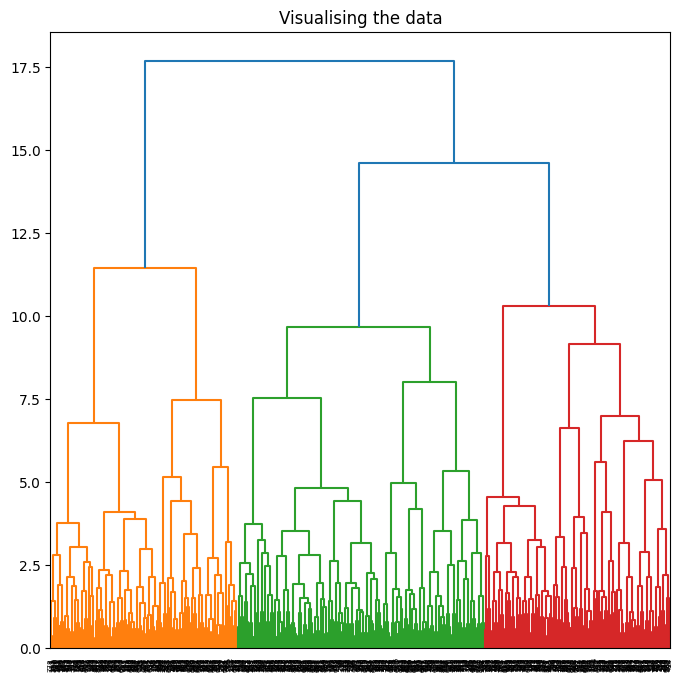

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X1_train, method ='ward')))

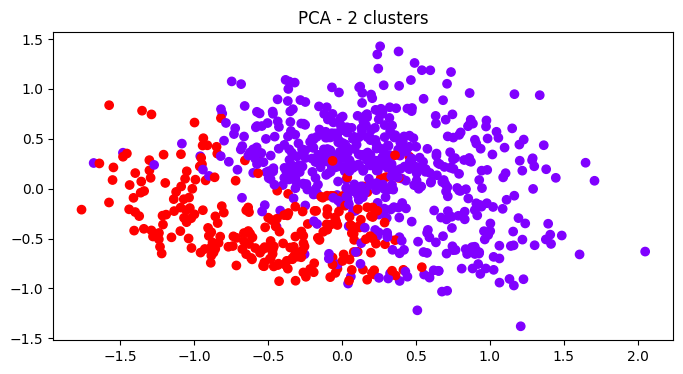

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(8, 4))
plt.scatter(X1_train.iloc[:,0], X1_train.iloc[:,1],
           c = ac2.fit_predict(X1_train), cmap ='rainbow')
plt.title("PCA - 2 clusters")
plt.show()

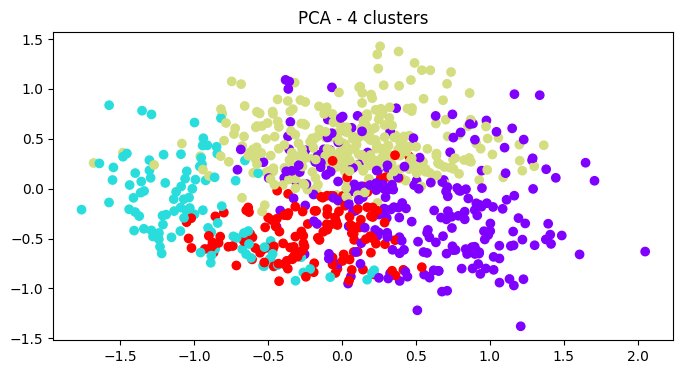

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 4)

# Visualizing the clustering
plt.figure(figsize =(8, 4))
plt.scatter(X1_train.iloc[:,0], X1_train.iloc[:,1],
           c = ac2.fit_predict(X1_train), cmap ='rainbow')
plt.title("PCA - 4 clusters")

plt.show()

In [ ]:
kmeans_object = KMeans(n_clusters=5, random_state=1240)
kmeans_object.fit(X1_train)

kmeans_clusters = kmeans_object.labels_

In [ ]:
kmeans_clusters

array([0, 2, 1, 3, 2, 2, 2, 2, 4, 2, 1, 0, 1, 2, 3, 2, 4, 1, 3, 0, 4, 2,
       3, 0, 0, 2, 4, 2, 4, 3, 4, 4, 0, 2, 3, 1, 1, 4, 0, 1, 4, 2, 2, 4,
       0, 3, 3, 4, 2, 4, 4, 0, 1, 3, 3, 2, 4, 0, 4, 3, 1, 2, 1, 4, 4, 1,
       1, 2, 0, 4, 4, 4, 3, 1, 4, 0, 4, 1, 3, 4, 4, 2, 1, 1, 1, 1, 0, 0,
       1, 4, 1, 2, 1, 4, 1, 1, 1, 0, 4, 2, 1, 4, 1, 0, 0, 4, 4, 3, 2, 3,
       1, 3, 0, 4, 2, 3, 1, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 3, 1, 2,
       3, 4, 3, 4, 3, 1, 2, 0, 4, 4, 1, 1, 1, 1, 1, 0, 4, 0, 0, 0, 2, 4,
       2, 3, 4, 0, 1, 3, 0, 1, 2, 2, 1, 4, 1, 0, 3, 4, 0, 2, 1, 2, 2, 2,
       4, 4, 4, 3, 0, 3, 4, 1, 1, 0, 4, 0, 3, 0, 0, 4, 4, 4, 2, 1, 1, 1,
       2, 4, 4, 2, 4, 1, 4, 2, 0, 0, 4, 4, 4, 4, 0, 4, 4, 2, 4, 4, 0, 3,
       2, 4, 3, 2, 2, 1, 1, 1, 2, 1, 3, 3, 4, 0, 2, 4, 4, 4, 4, 4, 2, 1,
       2, 0, 3, 4, 0, 4, 4, 3, 2, 1, 4, 2, 2, 2, 3, 4, 2, 1, 4, 4, 1, 4,
       2, 4, 0, 4, 1, 0, 2, 1, 4, 4, 2, 0, 3, 2, 2, 2, 1, 0, 4, 2, 1, 4,
       4, 1, 0, 2, 0, 3, 4, 4, 3, 2, 2, 2, 0, 3, 3,

In [ ]:
kmeans_results = pd.DataFrame({"label":y1_train,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

,label,kmeans_cluster
49,c-CS-m,0
673,t-CS-m,2
595,t-CS-m,1
29,c-CS-m,3
352,c-CS-s,2


In [ ]:
print(kmeans_results.label.value_counts())
print(kmeans_results.kmeans_cluster.value_counts())

c-SC-m    127
c-CS-m    126
t-SC-m    106
t-CS-m    102
c-SC-s     94
c-CS-s     90
t-CS-s     85
t-SC-s     81
Name: label, dtype: int64
4    251
2    167
1    159
0    128
3    106
Name: kmeans_cluster, dtype: int64


In [ ]:
# ideal clustring number wss i.e (inertia)
# minimum wss - better clustering

wss= {}
for k in range(2, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=40,max_iter=300,random_state=1000).fit(X1_train)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center
wss

{2: 1014.5516288342828,
 3: 897.9013066397373,
 4: 824.9665716813884,
 5: 768.5451572027459,
 6: 728.8531520278793,
 7: 693.0085565143229,
 8: 662.7289423973502,
 9: 635.5328037615616,
 10: 614.3120714212041,
 11: 597.6346441100483,
 12: 579.2034688079434,
 13: 562.3338161907982,
 14: 548.7450006468699,
 15: 533.2184452589237,
 16: 517.4315008940898,
 17: 504.0374928501942,
 18: 493.16606646073615,
 19: 481.8307100861807,
 20: 475.75834726335614}

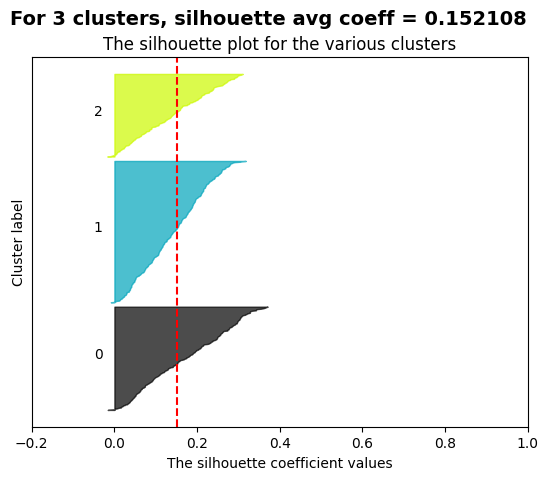

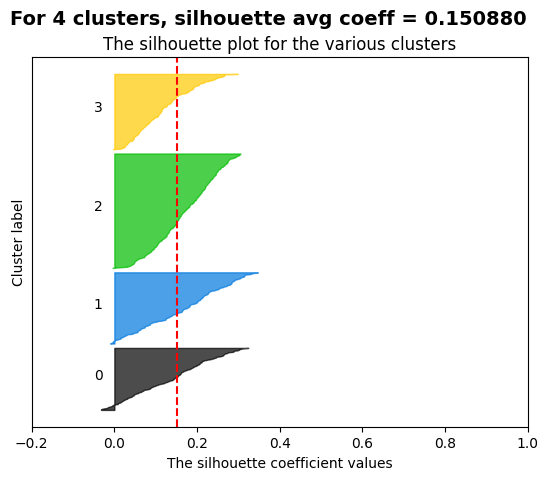

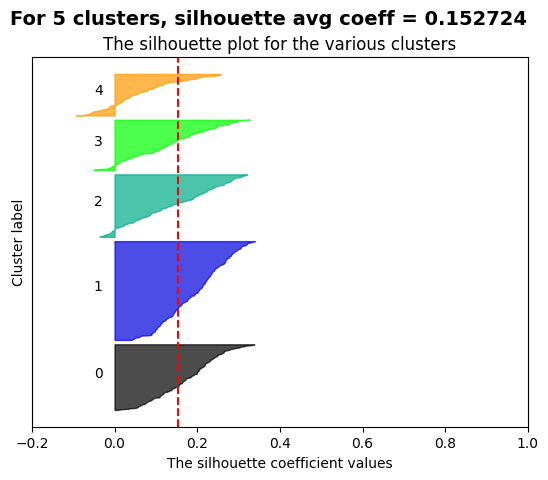

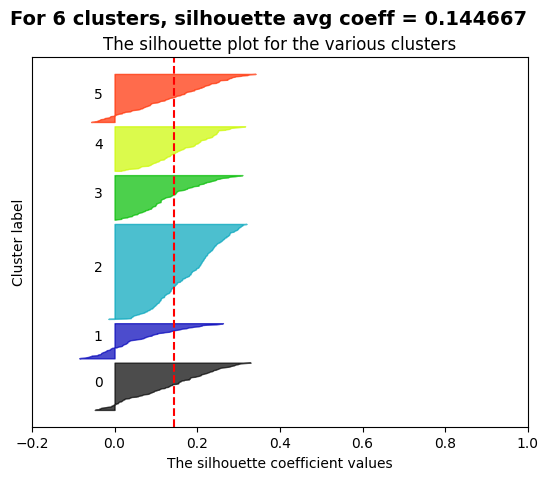

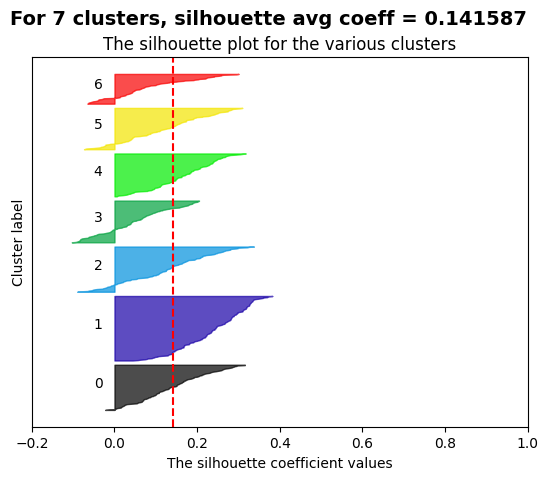

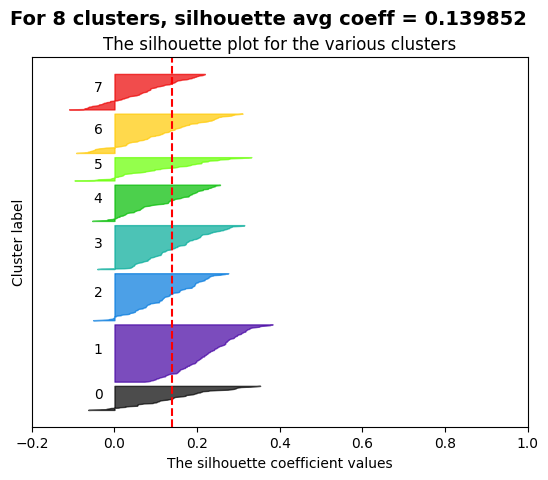

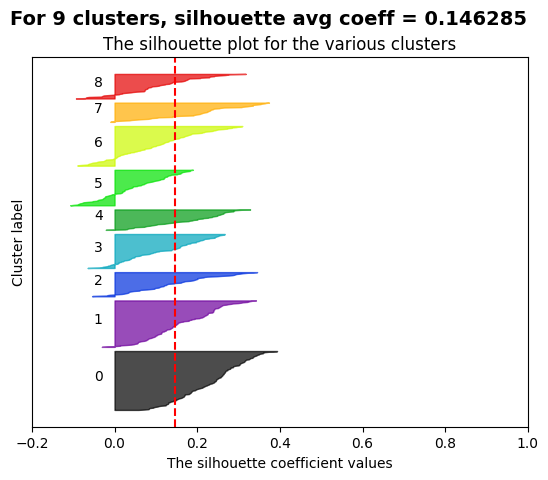

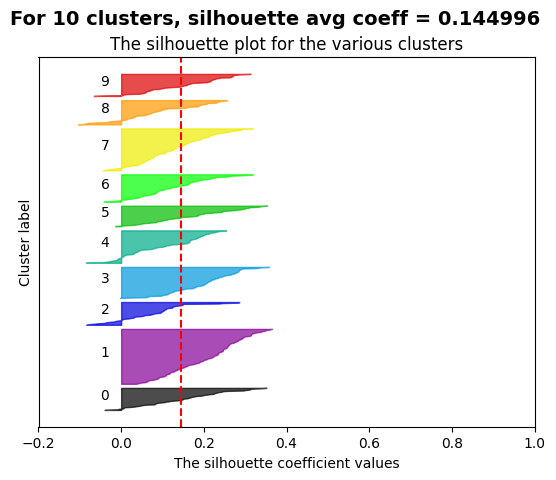

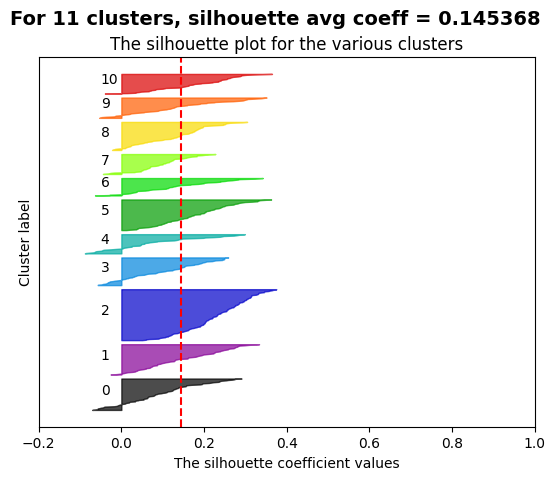

In [ ]:
# shilhoute analysis
# higher the shilhoute score higher the clustering

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = X1_train.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

Hence with pca the best number of clusters we have got is 5

In [ ]:
best_kmeans = KMeans(n_clusters=5, random_state=1240)
best_kmeans.fit(X1_train)
best_kmeans_labels = best_kmeans.labels_

In [ ]:
kmeans_results = pd.DataFrame({"class":y1_train,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,class,kmeans_cluster
49,c-CS-m,0
673,t-CS-m,2
595,t-CS-m,1
29,c-CS-m,3
352,c-CS-s,2


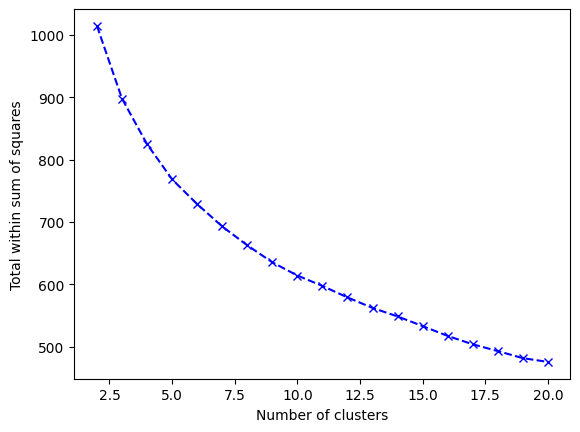

In [ ]:
%matplotlib inline
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

In [ ]:
kmeans_results

,class,kmeans_cluster
49,c-CS-m,0
673,t-CS-m,2
595,t-CS-m,1
29,c-CS-m,3
352,c-CS-s,2
...,...,...
10,c-CS-m,2
397,c-CS-s,2
765,t-SC-m,4
158,c-SC-m,4


In [ ]:
# checking cluster stablilty
from sklearn.metrics import adjusted_rand_score
indices = X1_train.sample(frac=0.9,random_state=123).index
mice_class_std_subset = X1_train.loc[indices,:]

In [ ]:
# clus 1
kmeans_object = KMeans(n_clusters=9,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(X1_train)
clus1= kmeans_object.labels_
print(len(clus1))

811


In [ ]:
# clus 2
kmeans_object = KMeans(n_clusters=8,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(mice_class_std_subset)
clus2 = kmeans_object.labels_
print(len(clus2))

730


### DBSCAN

In [ ]:
def dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

    return y_pred

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,class,kmeans_cluster
49,0.898204,-0.214876,-0.510504,0.394035,0.630549,0.212064,-0.260245,-0.120546,-0.231027,-0.078254,0.219581,-0.031295,-0.111845,-0.199173,-0.127101,0.002045,-0.015424,0.037700,-0.024844,-0.025291,-0.095204,-0.017502,-0.099638,-0.047839,-0.034537,0.036278,-0.019175,0.067893,0.034156,0.121313,c-CS-m,0
673,0.236093,0.183507,0.992237,-0.865242,-0.180901,0.139025,-0.396896,0.426791,0.167327,0.017773,-0.202575,0.012430,-0.225193,-0.130132,0.029222,0.087520,-0.086739,-0.185735,0.055568,0.100409,0.086552,0.091568,0.030802,0.052877,-0.071957,0.137670,0.162770,0.130578,0.048163,0.109393,t-CS-m,0
595,-1.050190,0.173594,0.259153,0.493272,0.286518,-0.055256,0.075541,0.199650,0.033366,-0.165482,-0.284747,0.011794,-0.049455,-0.098049,0.103442,0.146612,-0.181978,0.128150,0.039903,0.027943,0.098308,-0.114040,-0.032102,-0.137592,-0.087172,-0.076582,-0.068995,-0.017914,-0.020513,0.078886,t-CS-m,0
29,-0.707134,0.189548,1.065609,0.806067,0.150103,0.065068,0.039643,-0.149228,0.090169,0.103723,-0.078936,0.163741,0.123938,-0.153179,0.007464,0.070398,0.044180,-0.086761,0.022637,-0.065160,-0.038959,0.067434,-0.078052,-0.055539,-0.078189,-0.025147,-0.073500,-0.054776,-0.079931,-0.030664,c-CS-m,0
352,0.041136,-0.951252,0.394338,-0.000674,0.323576,-0.426516,0.183853,0.678246,0.291571,-0.272979,0.542252,0.052583,0.229138,-0.127897,-0.023122,0.086256,0.014109,-0.180949,0.004588,-0.051605,-0.022572,0.088850,-0.001257,0.024739,-0.057226,-0.075390,0.011143,0.002832,0.026396,-0.018622,c-CS-s,0
915,-0.166308,-0.051901,-0.397095,-0.482758,-0.000208,0.410365,0.369301,0.195145,-0.171904,0.190870,-0.310584,-0.133223,0.112834,0.070454,-0.017416,0.147963,0.177600,0.020751,-0.156333,-0.045589,0.237231,0.118810,-0.066090,0.090547,0.017918,-0.081326,0.135942,0.008903,0.082669,0.049742,t-CS-s,0
841,-0.044248,-0.844523,-0.497307,-0.707340,0.232338,0.515760,0.099596,-0.009003,0.046727,-0.067198,-0.057014,-0.314957,0.156494,0.189877,-0.024889,-0.256805,0.281219,-0.067873,0.306775,-0.041220,-0.071327,-0.334055,0.301311,0.127890,-0.014976,-0.018586,-0.094115,-0.031697,-0.081097,0.117456,t-CS-s,0
916,-0.176755,-0.052012,-0.335816,-0.471776,-0.074223,0.413687,0.398031,0.181773,-0.176587,0.199239,-0.333504,-0.152269,0.152130,0.093050,0.051750,0.147257,0.110363,0.026478,-0.167626,-0.038051,0.228590,0.150065,-0.025951,0.040027,-0.025844,-0.049249,0.062416,-0.058673,0.030143,0.022702,t-CS-s,0
484,-0.278859,0.230521,-0.354615,0.528948,-0.336393,-0.004702,0.238419,0.230303,-0.152891,0.236184,-0.096678,-0.129951,-0.008780,0.097281,0.193068,-0.038952,0.035019,0.000623,-0.038364,-0.004504,0.036550,0.105761,-0.067678,0.050437,-0.069346,0.086111,0.071235,-0.023647,-0.003417,0.022945,c-SC-s,0
324,-0.261829,-0.472349,0.391111,-0.189695,0.013126,-0.082245,-0.166047,-0.294522,-0.304269,0.123782,0.353668,0.062067,-0.055448,0.129677,0.018626,0.154496,0.016674,0.103325,-0.125440,0.042006,-0.021219,-0.039960,0.099401,-0.017146,0.006806,-0.051882,0.058797,-0.064114,0.004696,-0.049725,c-CS-s,0


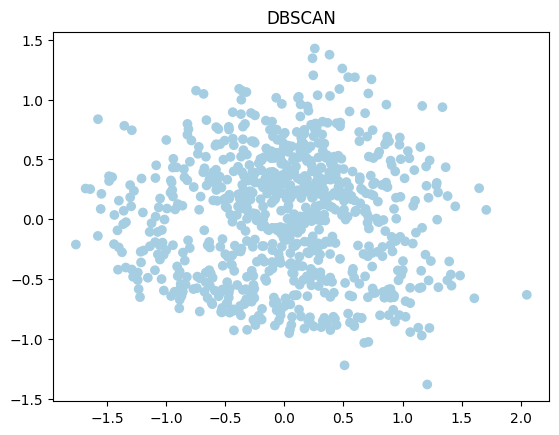

In [ ]:
# DBSCAN for train set
pred = dbscan(np.array(X1_train), eps=3, min_samples=2)
kmeans_results = pd.DataFrame({"class":y1_train,"kmeans_cluster":pred})
final_cluster_data = pd.merge(X1_train, kmeans_results, left_index=True, right_index=True)
final_cluster_data.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,class,kmeans_cluster
615,1.308241,-0.969419,0.196680,0.363649,0.224518,-0.111264,0.207031,0.230851,0.014995,0.080339,-0.229711,0.247614,0.059372,0.038676,-0.075533,-0.006449,-0.049838,0.083911,0.152001,-0.104667,-0.038874,-0.134472,-0.073920,-0.076685,-0.016240,0.044797,-0.043435,0.024345,-0.048834,-0.086725,t-CS-m,0
473,0.226239,0.429509,-0.546192,0.175541,0.005813,-0.193245,-0.026661,0.165073,-0.017759,0.349615,-0.003114,-0.026564,-0.073533,0.114500,-0.000512,0.017234,-0.021504,-0.130575,-0.068937,0.004682,0.138539,-0.011235,0.015894,0.003766,-0.014996,0.051308,0.046137,0.014472,-0.013597,0.047206,c-SC-s,0
297,-0.215999,0.579977,-0.114068,-0.288348,0.296731,-0.523726,-0.084703,-0.043093,-0.043657,0.119193,0.061457,0.046947,0.125860,-0.104610,0.184015,0.258561,0.141801,0.144651,-0.061476,0.129057,-0.299113,-0.226124,-0.121506,0.113306,-0.124205,-0.069455,-0.012666,0.086566,0.080605,0.013380,c-SC-m,0
572,-0.676740,-0.352695,-0.665284,0.111792,0.252750,-0.157331,0.013793,-0.041749,0.292905,-0.128080,-0.155787,0.088197,-0.097718,0.148102,-0.057012,0.050981,-0.172216,0.175292,0.006903,0.092267,0.133937,-0.032635,0.032631,0.108279,0.014536,0.044672,-0.121373,-0.064479,0.115880,0.101860,t-CS-m,0
438,0.918342,0.150798,-0.442732,0.249925,-0.231414,-0.174764,0.161227,-0.036275,-0.087464,0.221525,0.064387,-0.000352,-0.022272,-0.046644,-0.023928,-0.067761,-0.003310,-0.068717,0.049302,0.015460,-0.052383,0.015754,-0.035897,-0.058466,0.056466,-0.009352,0.075487,0.051392,0.037258,0.014264,c-SC-s,0
162,0.217433,1.078513,0.191623,0.024196,0.140213,-0.357152,-0.220356,0.311335,0.022205,0.032622,-0.104251,0.021154,-0.154302,0.082373,0.186066,-0.032710,0.025975,-0.001045,0.062530,0.192170,-0.114711,0.020379,0.192832,-0.016963,-0.157379,-0.150661,-0.155128,-0.000609,-0.061168,0.029146,c-SC-m,0
808,-0.438648,0.691148,0.040767,0.365929,-0.025241,0.104992,-0.230616,0.177498,-0.322796,-0.298501,-0.123564,0.108590,0.146187,-0.118544,0.039615,0.068900,0.004686,0.088417,0.054735,-0.044496,0.015856,-0.016434,-0.038593,0.048830,-0.045319,-0.011816,-0.094843,0.063595,-0.011274,-0.049320,t-SC-m,0
843,-0.692223,-0.775425,-0.176172,-0.645173,-0.059502,0.380734,0.181841,0.002014,0.080889,0.014707,-0.109588,-0.171213,0.047240,-0.005470,-0.004133,-0.177471,0.110105,0.006260,0.200195,-0.022181,-0.003870,-0.252161,0.260708,0.108301,-0.044931,-0.048069,-0.068352,-0.019269,-0.073837,0.056153,t-CS-s,0
245,-0.184659,0.362523,-0.032057,0.389508,-0.414719,0.210117,-0.242240,-0.030890,0.311540,-0.026743,0.140998,-0.069155,-0.022300,-0.026885,-0.102866,-0.125011,-0.059940,-0.089214,-0.097156,-0.032781,-0.000603,-0.002644,0.091741,-0.065953,-0.067664,-0.002347,0.082002,-0.126931,-0.051129,0.020271,c-SC-m,0
617,0.992805,-0.930460,0.023898,0.308524,0.216082,-0.123900,0.228462,0.219893,-0.056314,0.012644,-0.262807,0.291815,0.051291,0.022086,-0.060126,0.032879,-0.058920,0.068628,0.131361,-0.090600,-0.073462,-0.097508,-0.071607,-0.061334,-0.004025,0.008798,-0.047446,0.009573,0.035496,-0.062266,t-CS-m,0


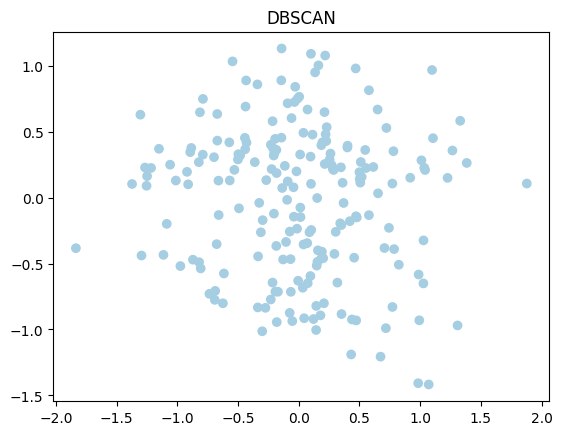

In [ ]:
# DBSCAN for test set
pred = dbscan(np.array(X1_test), eps=5, min_samples=10)
kmeans_results = pd.DataFrame({"class":y1_test,"kmeans_cluster":pred})
final_cluster_data = pd.merge(X1_test, kmeans_results, left_index=True, right_index=True)
final_cluster_data.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,class,kmeans_cluster
0,0.652119,-0.823649,0.301098,0.443622,-0.118196,-0.069178,0.044816,-0.002469,-0.007249,0.352363,-0.030166,0.086612,-0.008021,0.021946,-0.075636,-0.106149,0.047560,0.238842,0.041286,-0.120638,-0.018278,-0.087425,-0.042652,0.014446,0.074839,0.108339,-0.075117,-0.088963,-0.080891,-0.130176,c-CS-m,0
1,0.428570,-0.830978,0.159597,0.364767,-0.078267,-0.102891,0.027407,-0.001232,-0.004816,0.346843,-0.024882,0.128419,-0.005733,0.027152,-0.049777,-0.101820,0.080808,0.246630,0.049091,-0.158699,-0.007371,-0.054038,-0.020594,0.027248,0.096660,0.077656,-0.047448,-0.110455,-0.099945,-0.092060,c-CS-m,0
2,0.442582,-0.882709,0.131571,0.302495,-0.038058,-0.145154,0.038887,-0.015738,0.032808,0.375569,-0.031858,0.159430,-0.023780,0.021323,-0.034535,-0.113607,0.092127,0.253719,0.032054,-0.158632,0.007182,-0.045060,-0.035766,0.065265,0.077491,0.067583,-0.036580,-0.099038,-0.012667,-0.148119,c-CS-m,0
3,0.079153,-0.634878,0.439594,0.250595,-0.157537,-0.180182,-0.023676,-0.033807,-0.015680,0.326363,0.044155,0.163158,-0.023016,0.006555,-0.109640,-0.089867,0.095444,0.143179,-0.021700,-0.082982,0.054513,-0.070750,-0.001388,0.065842,0.101664,0.074313,-0.081550,-0.055358,-0.045311,-0.075115,c-CS-m,0
4,-0.063726,-0.690756,0.266582,0.167642,-0.121422,-0.206620,-0.104209,-0.001118,-0.014423,0.330848,0.058119,0.204277,-0.045538,0.023115,-0.111920,-0.084351,0.106925,0.173394,-0.038789,-0.106894,0.041232,-0.020888,0.037611,0.088743,0.074351,0.038871,0.001760,-0.049263,-0.033889,-0.062721,c-CS-m,0


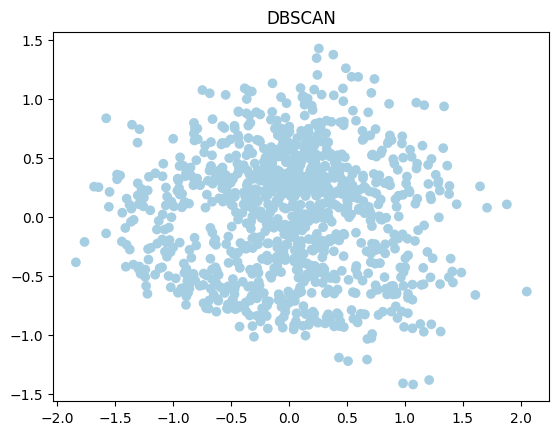

In [ ]:
# entire dataset
pred = dbscan(np.array(X1), eps=5, min_samples=10)
kmeans_results = pd.DataFrame({"class":y1,"kmeans_cluster":pred})
final_cluster_data = pd.merge(X1, kmeans_results, left_index=True, right_index=True)
final_cluster_data.head()

### Hierarchical Clustering

In [ ]:
def hier(X, n_clusters=5):
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

    return y_pred

,class,kmeans_cluster
49,c-CS-m,2
673,t-CS-m,3
595,t-CS-m,1
29,c-CS-m,2
352,c-CS-s,2
915,t-CS-s,0
841,t-CS-s,3
916,t-CS-s,0
484,c-SC-s,0
324,c-CS-s,3


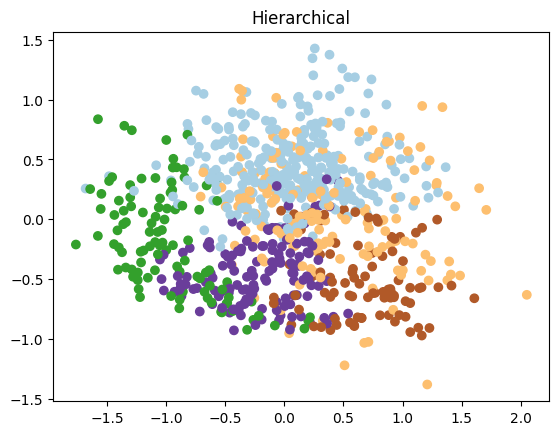

In [ ]:
# hierarichcal for train set

pred = hier(np.array(X1_train), 5)
kmeans_results = pd.DataFrame({"class":y1_train,"kmeans_cluster":pred})
kmeans_results.head(10)

,class,kmeans_cluster
615,t-CS-m,2
473,c-SC-s,2
297,c-SC-m,4
572,t-CS-m,1
438,c-SC-s,2
162,c-SC-m,4
808,t-SC-m,0
843,t-CS-s,0
245,c-SC-m,4
617,t-CS-m,2


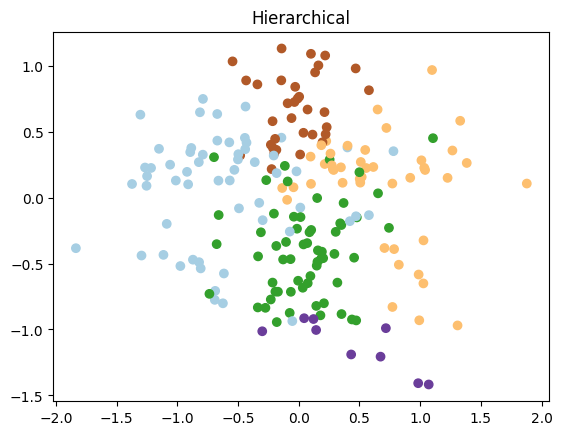

In [ ]:
# hierarichcal for test set

pred = hier(np.array(X1_test), 5)
kmeans_results = pd.DataFrame({"class":y1_test,"kmeans_cluster":pred})
kmeans_results.head(10)

### K-Means Clustering

In [ ]:
def kmeans(X, n_clusters):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-Means")

    return y_pred

,class,kmeans_cluster
49,c-CS-m,0
673,t-CS-m,4
595,t-CS-m,3
29,c-CS-m,4
352,c-CS-s,1
915,t-CS-s,1
841,t-CS-s,1
916,t-CS-s,1
484,c-SC-s,2
324,c-CS-s,1


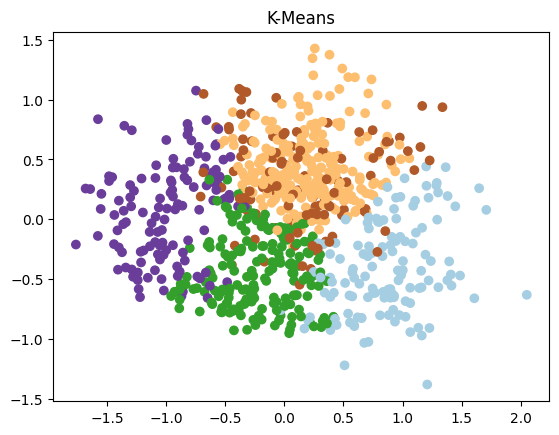

In [ ]:
# kmeans for train set

pred = kmeans(np.array(X1_train), 5)
kmeans_results = pd.DataFrame({"class":y1_train,"kmeans_cluster":pred})
kmeans_results.head(10)

,class,kmeans_cluster
615,t-CS-m,0
473,c-SC-s,1
297,c-SC-m,2
572,t-CS-m,4
438,c-SC-s,1
162,c-SC-m,2
808,t-SC-m,2
843,t-CS-s,4
245,c-SC-m,2
617,t-CS-m,0


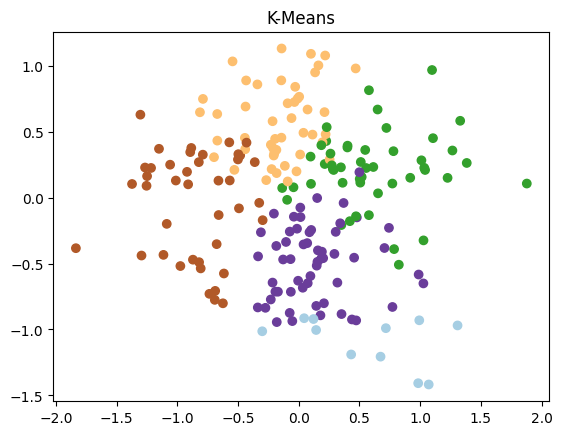

In [ ]:
# hierarichcal for test set

pred = kmeans(np.array(X1_test), 5)
kmeans_results = pd.DataFrame({"class":y1_test,"kmeans_cluster":pred})
kmeans_results.head(10)

# Test

In [ ]:
# # subset data for normal and abnormal mice
# normal_mice = mice_df[mice_df['Genotype']=='Control']
# abnormal_mice = mice_df[mice_df['Genotype']!='Control'].reset_index().drop(['index'], axis=1)

# display(normal_mice)
# display(abnormal_mice)

In [ ]:
# print(normal_mice.shape)
# print(abnormal_mice.shape)

In [ ]:
# # check relation between proteins in normal mice
# plt.figure(figsize=(10,6))
# sns.heatmap(normal_mice.corr(), cmap='Blues') # the center columns in the plot may be familiar with one class
# plt.title("Heat Map - Normal Mice", size=12)
# plt.show()

In [ ]:
# # check relation between proteins in abnormal mice

# # the center columns in the plot may be familiar with one class
# # the top-left columns can be familiar with many columns in abnormal mice
# plt.figure(figsize=(10,6))
# sns.heatmap(abnormal_mice.corr(), cmap='Blues')
# plt.title("Heat Map - Abnormal Mice", size=12)
# plt.show()

In [ ]:
# # take down all the proteins used in normal mice
# # groupby treatment, behaviour & class and take mean

# grouped_normal_mice = normal_mice.groupby(['Treatment', 'Behavior', 'class']).mean()
# grouped_normal_mice